In [1]:
import pandas as pd
from pymongo import MongoClient
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
client = MongoClient()
client = MongoClient('localhost', 27017)
mydatabase = client['tweet_DB']
    
mycollection=mydatabase['London']
t = list(mycollection.find())
df = pd.DataFrame(t)
df

,_id,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,6266f068b2488389e2269f4b,1518666423194816512,1518666423194816512,2022-04-25 22:01:05 ????????????? ????? (????),2022-04-25,22:01:05,300,170690086,iiaahhh,aya,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,6266f068b2488389e2269f4c,1518666422855086081,1518649122454228993,2022-04-25 22:01:05 ????????????? ????? (????),2022-04-25,22:01:05,300,2320754742,sospainter,🅿🅰🆄🅻 🅲🅾🅻🅻🅸🅴🆁,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BrydonN2', 'name': 'BrydonN'...",NaN,NaN,NaN,NaN
2,6266f068b2488389e2269f4d,1518666422393896960,1518666422393896960,2022-04-25 22:01:05 ????????????? ????? (????),2022-04-25,22:01:05,300,2782589673,mbbxo_,XO,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,6266f068b2488389e2269f4e,1518666421936566276,1518666421936566276,2022-04-25 22:01:05 ????????????? ????? (????),2022-04-25,22:01:05,300,531601941,g_njvv,🇯🇲 IG: Dre_flix 🇯🇲,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,6266f068b2488389e2269f4f,1518666421772955648,1518666421772955648,2022-04-25 22:01:05 ????????????? ????? (????),2022-04-25,22:01:05,300,246819632,kapowprimary,Kapow Primary,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,6266f068b2488389e226ab05,1518665203617046528,1518665203617046528,2022-04-25 21:56:14 ????????????? ????? (????),2022-04-25,21:56:14,300,107219330,joaouniverse,jp,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3003,6266f068b2488389e226ab06,1518665203419947010,1518344633998262274,2022-04-25 21:56:14 ????????????? ????? (????),2022-04-25,21:56:14,300,1417640044546957314,october_kai,Kai,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3004,6266f068b2488389e226ab07,1518665203268915203,1518636293621784578,2022-04-25 21:56:14 ????????????? ????? (????),2022-04-25,21:56:14,300,1124615241021710336,mabsoud,Michael Absoud,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sunilbhop', 'name': 'Sunil B...",NaN,NaN,NaN,NaN
3005,6266f068b2488389e226ab08,1518665202933407746,1518656747933683712,2022-04-25 21:56:14 ????????????? ????? (????),2022-04-25,21:56:14,300,1225229339203178499,sheilac21653571,Sheila Carroll,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Underdogsbiteup', 'name': 'L...",NaN,NaN,NaN,NaN


In [3]:
df.shape 

(3007, 37)

### looks like there is 36 column and 3007 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              3007 non-null   object 
 1   id               3007 non-null   int64  
 2   conversation_id  3007 non-null   int64  
 3   created_at       3007 non-null   object 
 4   date             3007 non-null   object 
 5   time             3007 non-null   object 
 6   timezone         3007 non-null   int64  
 7   user_id          3007 non-null   int64  
 8   username         3007 non-null   object 
 9   name             3007 non-null   object 
 10  place            5 non-null      object 
 11  tweet            3007 non-null   object 
 12  language         3007 non-null   object 
 13  mentions         3007 non-null   object 
 14  urls             3007 non-null   object 
 15  photos           3007 non-null   object 
 16  replies_count    3007 non-null   int64  
 17  retweets_count

### 1) Out of 36 columns, only 24 columns have complete data. 2) 9 columns data are missing

### Looking at the percentage of missing values per column

In [5]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/df.shape[0])*100})
missing_data

,total_missing,perc_missing
_id,0,0.000000
id,0,0.000000
conversation_id,0,0.000000
created_at,0,0.000000
date,0,0.000000
time,0,0.000000
timezone,0,0.000000
user_id,0,0.000000
username,0,0.000000
name,0,0.000000


### Statistical description of numerical variables

In [6]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,3.007000e+03,3.007000e+03,3007.0,3.007000e+03,3007.000000,3007.000000,3007.000000,3007.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.518666e+18,1.518091e+18,300.0,5.111499e+17,0.188893,0.208846,0.982374,0.177586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.609382e+11,1.107205e+16,0.0,6.212096e+17,1.499912,2.886570,8.592963,0.382227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.518665e+18,1.164917e+18,300.0,4.230300e+04,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.518666e+18,1.518640e+18,300.0,2.346102e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.518666e+18,1.518665e+18,300.0,2.610278e+09,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.518666e+18,1.518666e+18,300.0,1.198437e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.518666e+18,1.518666e+18,300.0,1.518657e+18,62.000000,113.000000,262.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Lets take relevant numeric columns and see grafic info 

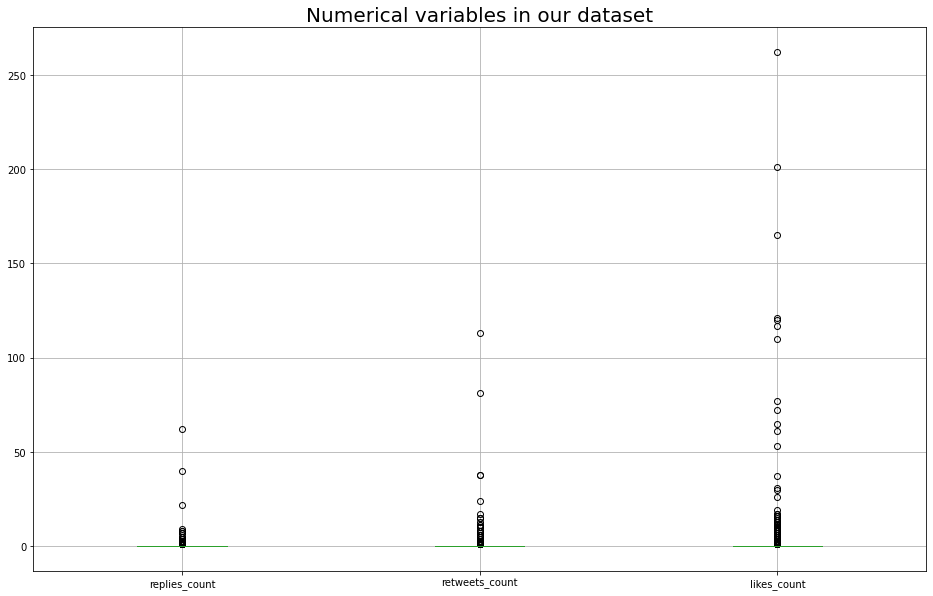

In [7]:
from matplotlib import pyplot as plt
num_cols = ['replies_count','retweets_count', 'likes_count']
plt.figure(figsize=(16,10))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataset", fontsize=20)
plt.show()

#### as we see most likes and retweets are in range of 20

# Now lets see tweets info 

In [8]:
NumOf_Words = []
NumOf_Let = []
Word_Avg_Size = []
NumOf_Stopwords = []
NumOf_Number_Char = []
NumOf_Hashtag = []
NumOf_a = []
NumOf_Other_Sym = []
NumOf_Caps_Words = []

ttw = df

for t in ttw.tweet:
    
    val = re.findall(r'\w+', t)
    NumOf_Words.append(len(val))
    
    val = re.findall(r'\w', t)
    NumOf_Let.append(len(val))
    
    val = re.findall(r'\w+', t)
    if len(val)==0:
        average = 0
    else:
        average = sum(len(word) for word in val) / len(val)
    Word_Avg_Size.append(round(average, 3))
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(t)
    cnt_Stopwords = [w for w in word_tokens if w in stop_words]
    NumOf_Stopwords.append(len(cnt_Stopwords))
    
    val = re.findall(r'[0-9]', t)
    NumOf_Number_Char.append(len(val))
    
    val = re.findall(r'[#]', t)
    NumOf_Hashtag.append(len(val))
    
    val = re.findall(r'[@]', t)
    NumOf_a.append(len(val))
    
    val = re.findall(r'[^a-zA-Z0-9 ]', t)
    NumOf_Other_Sym.append(len(val))
    
    val = re.findall(r'[A-Z]\w+', t)
    NumOf_Caps_Words.append(len(val))
    
final2 = pd.DataFrame({'NumOf_Words': NumOf_Words, 
                      'NumOf_Let': NumOf_Let, 
                      'Word_Avg_Size': Word_Avg_Size, 
                      'NumOf_Stopwords': NumOf_Stopwords, 
                      'NumOf_Number_Char': NumOf_Number_Char,
                      'NumOf_#': NumOf_Hashtag, 
                      'NumOf_@': NumOf_a, 
                      'NumOf_Other_Sym': NumOf_Other_Sym, 
                      'NumOf_Caps_Words': NumOf_Caps_Words})
final2.head()   

,NumOf_Words,NumOf_Let,Word_Avg_Size,NumOf_Stopwords,NumOf_Number_Char,NumOf_#,NumOf_@,NumOf_Other_Sym,NumOf_Caps_Words
0,5,24,4.800,2,0,0,0,0,1
1,39,166,4.256,12,1,0,2,8,5
2,20,88,4.400,11,0,1,0,3,1
3,7,30,4.286,1,0,0,0,1,0
4,47,227,4.830,11,4,1,0,23,11


#### now we can see words and symbols statistics

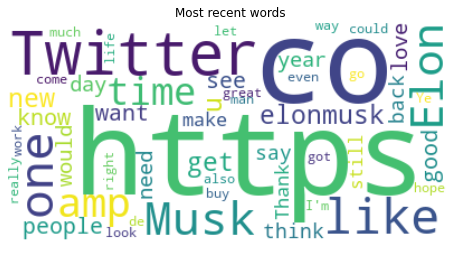

In [9]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 

import seaborn as sns

ttw2 = df
text2 = ''
for i in range(len(ttw2.tweet)):
    text2 = text2 + ttw2.tweet[i]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50, background_color="white", stopwords = stop_words, collocations=False).generate(text2)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most recent words')
plt.axis("off")
plt.show()

#### here we can see most common words except stopwords in tweets from London

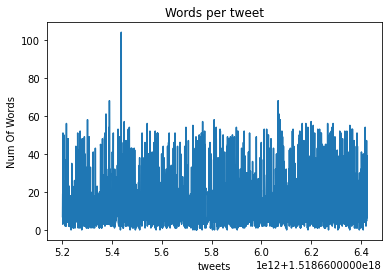

In [10]:
tweet1 = ttw['id'].tolist()
plt.plot(tweet1, NumOf_Words)                                             
plt.xlabel('tweets')
plt.ylabel('Num Of Words')
plt.xticks()
plt.title('Words per tweet')
plt.yticks()
plt.style.use('default')
plt.show()

C:\Users\jenga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


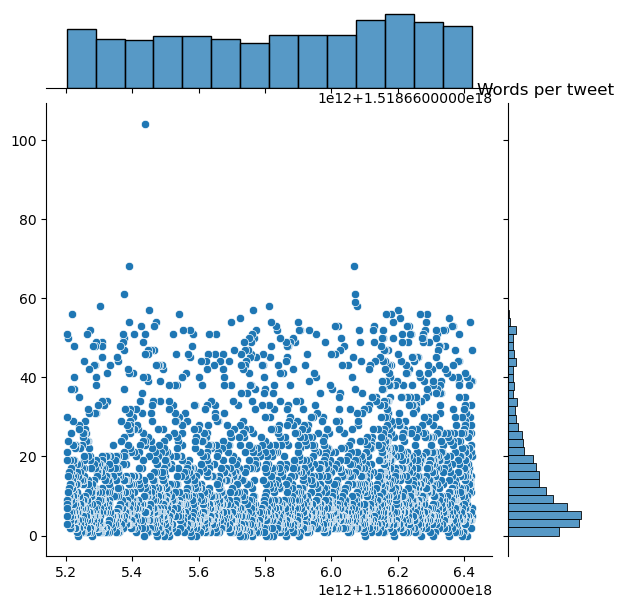

In [11]:
sns.jointplot(tweet1, NumOf_Words)
plt.xlabel('tweets')
plt.title('Words per tweet')
plt.show()

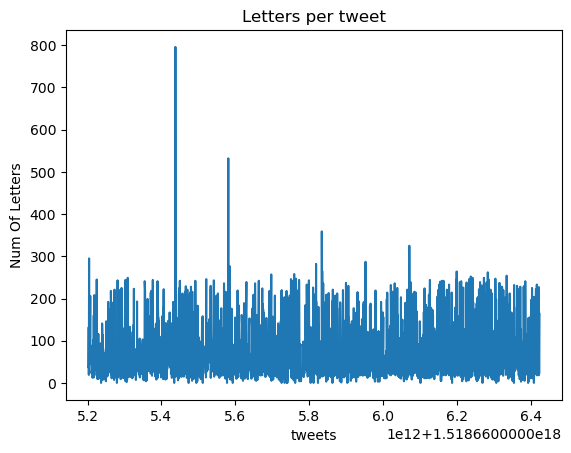

In [12]:
tweet2 = ttw['id'].tolist()
plt.plot(tweet2, NumOf_Let)                                             
plt.xlabel('tweets')
plt.ylabel('Num Of Letters')
plt.xticks()
plt.title('Letters per tweet')
plt.yticks()
plt.style.use('default')
plt.show()

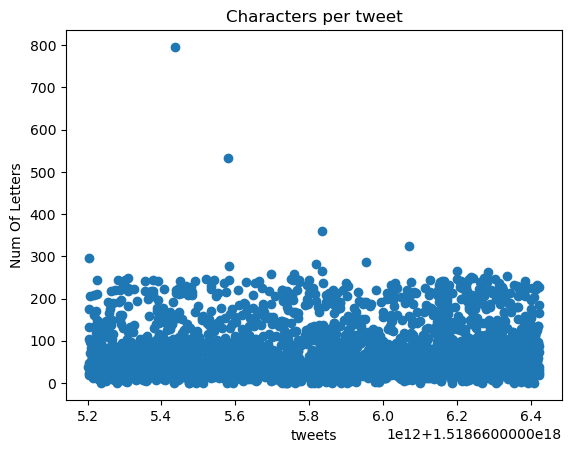

In [13]:
plt.scatter(tweet2, NumOf_Let)
plt.style.use('default')
plt.xlabel('tweets')
plt.ylabel('Num Of Letters')
plt.title('Characters per tweet')
plt.show()

### Lets clean our tweets

In [14]:
ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','') 
ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','') 
ttw2['tweet'].head(15)

C:\Users\jenga\AppData\Local\Temp\ipykernel_11324\2757176602.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','')
C:\Users\jenga\AppData\Local\Temp\ipykernel_11324\2757176602.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','')


0                           rom now on heels everywhere
1     rydon aranheiddle  used to cook chicken breast...
2     m sure she already knew but its just worse now...
3                    m sooooo annoyed liverpool got him
4     o find out more about apow rimary  visit our a...
5        i really hope we can get an actual contest in 
6                                        a pelota del  
7     nake ade bodycon dress and crop top coming rid...
8     ohn rescott said we are all middle class now o...
9                              mattlevine en dit button
10     deep dive into those dark overly perfumed sto...
11    ougsun cnnbrk he racist liberal media dont wan...
12                                dultosher wakarimasen
13    hen  was younger  used to look up to lon usk y...
14     never stop finding it funny in snooker when o...
Name: tweet, dtype: object

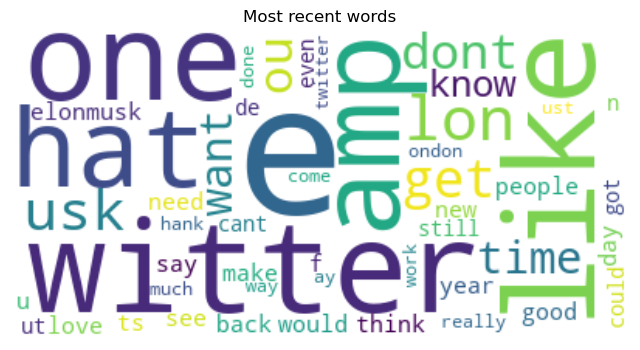

In [15]:
#ttw2 = df
text2 = ''
for i in range(len(ttw2.tweet)):
    text2 = text2 + ttw2.tweet[i]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50, background_color="white", stopwords = stop_words, collocations=False).generate(text2)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most recent words')
plt.axis("off")
plt.show()